<a href="https://colab.research.google.com/github/MilenkaGuerra/QM206/blob/main/Semestral_QM206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema #2

Desarrolle un programa de python para simular la cinética:

A -> X + B   (k1)

    X -> C (k2)


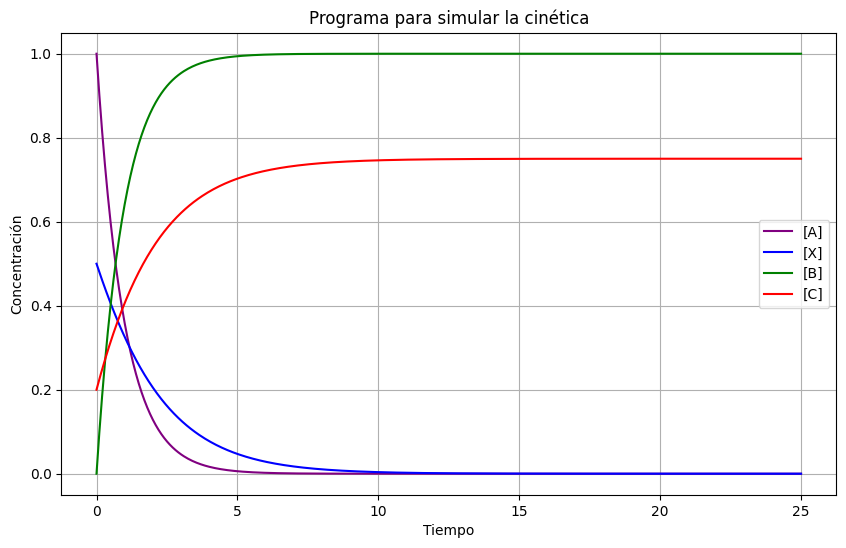

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_kinetics(k1,k2,A0,B0,X0,C0,tmax,dt):
    """
    Simula la cinética de las reacciones:
    A -> X + B (k1)
    X -> C (k2)

    Parámetros:
        k1: Constante de velocidad para A -> X + B
        k2: Constante de velocidad para X -> C
        A0: Concentración inicial de A
        X0: Concentración inicial de X
        B0: Concentración inicial de B
        C0: Concentración inicial de C
        t_max: Tiempo máximo de simulación
        dt: Incremento de tiempo (paso de integración)
    """
    #Variables
    t=np.arange(0,tmax+dt,dt)
    A=np.zeros_like(t)
    X=np.zeros_like(t)
    B=np.zeros_like(t)
    C=np.zeros_like(t)

    #Condiciones iniciales
    A[0]=A0
    X[0]=X0
    B[0]=B0
    C[0]=C0

    #si insertamos el método de euler para la interacción sería:
    for i in range(1,len(t)):
        dA=-k1*A[i-1]*dt
        dX=(k1*A[i-1]*dt-k2*X[i-1])*dt
        dB=k1*A[i-1]*dt
        dC=k2*X[i-1]*dt

        A[i] = A[i-1] + dA
        X[i] = X[i-1] + dX
        B[i] = B[i-1] + dB
        C[i] = C[i-1] + dC

    return t, A, X, B, C

#Ejemplo de datos a continuación para mi simulación
#Parárametros
k1= 1.0
k2= 0.5
A0= 1.0
X0= 0.5
B0= 0.0
C0= 0.2
tmax= 25
dt= 0.05
t, A, X, B, C = simulate_kinetics(k1,k2,A0,B0,X0,C0,tmax,dt)

#Mi gráfica para estos datos
plt.figure(figsize=(10,6))
plt.plot(t,A,label="[A]", color="purple")
plt.plot(t,X,label="[X]",color="blue")
plt.plot(t,B,label="[B]",color="green")
plt.plot(t,C,label="[C]",color="red")
plt.xlabel("Tiempo")
plt.ylabel("Concentración")
plt.title("Programa para simular la cinética")
plt.legend()
plt.grid(True)
plt.show()

Explicación:

Podemos observar en el gráfico que la [A]disminuye gradualmente, la[X] empieza mas alto pero eventualmente decae, en la[B] sube constantemente, y la [C] sube desde un valor inicial que no es nulo.



Problema #5

Diseñar un programa en Python que analice los resultados de un laboratorio clínico y clasifique cada parámetro como bajo, normal y alto para 5 pacientes diferentes. Nota: debe investigar cuales son los parámetros analizados en un uroanálisis y los rangos correspondientes a cada parámetro


Parámetros
*   pH de la orina:acidez o alcalinidad de la orina, su rango es de 4.5-8.0
*   Gravedad específica: mide la concentración de partículas en la orina, su rango es de 1.005 y 1.030
*  Proteínas: Los valores normales son menores a 150mg/dia, o sea,0-0.15mg/dL.
*  Glucosa: su rango es de 0-0.8mmol/L
*   Cetonas: 0-0.5mg/dL
*   Bilirrubina:2,5-10 mg/litro
*  Sangre: rango entre 5.5 y 7.0






In [ ]:
# Definir los rangos normales para cada parámetro
rangos_normales = {
    'pH': (4.5, 8.0),
    'Gravedad Específica': (1.005, 1.030),
    'Proteínas': (0, 0.15),  # mg/dL
    'Glucosa': (0, 0.8),     # mg/dL
    'Cetonas': (0, 0.5),     # mg/dL
    'Bilirrubina': (0, 0.2), # mg/dL
    'Sangre': (0, 0)         # mg/dL
}

# Función para clasificar los resultados
def clasificar_resultado(valor, parametro):
    min_val, max_val = rangos_normales[parametro]
    if valor < min_val:
        return 'Bajo'
    elif min_val <= valor <= max_val:
        return 'Normal'
    else:
        return 'Alto'

# Datos de los pacientes (ejemplo)
pacientes = {
    'Paciente 1': {'pH': 4.8, 'Gravedad Específica': 1.035, 'Proteínas': 0.3, 'Glucosa': 1.2, 'Cetonas': 0.7, 'Bilirrubina': 0.3, 'Sangre': 1},
    'Paciente 2': {'pH': 7.5, 'Gravedad Específica': 1.025, 'Proteínas': 0.05, 'Glucosa': 0.0, 'Cetonas': 0.0, 'Bilirrubina': 0.2, 'Sangre': 0},
    'Paciente 3': {'pH': 5.2, 'Gravedad Específica': 1.010, 'Proteínas': 0.2, 'Glucosa': 0.6, 'Cetonas': 0.2, 'Bilirrubina': 0.1, 'Sangre': 0},
    'Paciente 4': {'pH': 8.2, 'Gravedad Específica': 1.000, 'Proteínas': 0.4, 'Glucosa': 1.5, 'Cetonas': 1.0, 'Bilirrubina': 0.5, 'Sangre': 3},
    'Paciente 5': {'pH': 6.8, 'Gravedad Específica': 1.015, 'Proteínas': 0.1, 'Glucosa': 0.4, 'Cetonas': 0.3, 'Bilirrubina': 0.1, 'Sangre': 0}
}

# Analizar y clasificar los resultados
for paciente, resultados in pacientes.items():
    print(f"Resultados para {paciente}:")
    for parametro, valor in resultados.items():
        clasificacion = clasificar_resultado(valor, parametro)
        print(f"  {parametro}: {valor} - {clasificacion}")
    print()


Resultados para Paciente 1:
  pH: 4.8 - Normal
  Gravedad Específica: 1.035 - Alto
  Proteínas: 0.3 - Alto
  Glucosa: 1.2 - Alto
  Cetonas: 0.7 - Alto
  Bilirrubina: 0.3 - Alto
  Sangre: 1 - Alto

Resultados para Paciente 2:
  pH: 7.5 - Normal
  Gravedad Específica: 1.025 - Normal
  Proteínas: 0.05 - Normal
  Glucosa: 0.0 - Normal
  Cetonas: 0.0 - Normal
  Bilirrubina: 0.2 - Normal
  Sangre: 0 - Normal

Resultados para Paciente 3:
  pH: 5.2 - Normal
  Gravedad Específica: 1.01 - Normal
  Proteínas: 0.2 - Alto
  Glucosa: 0.6 - Normal
  Cetonas: 0.2 - Normal
  Bilirrubina: 0.1 - Normal
  Sangre: 0 - Normal

Resultados para Paciente 4:
  pH: 8.2 - Alto
  Gravedad Específica: 1.0 - Bajo
  Proteínas: 0.4 - Alto
  Glucosa: 1.5 - Alto
  Cetonas: 1.0 - Alto
  Bilirrubina: 0.5 - Alto
  Sangre: 3 - Alto

Resultados para Paciente 5:
  pH: 6.8 - Normal
  Gravedad Específica: 1.015 - Normal
  Proteínas: 0.1 - Normal
  Glucosa: 0.4 - Normal
  Cetonas: 0.3 - Normal
  Bilirrubina: 0.1 - Normal
  Sangr

Problema #1 Analisis de datos

Url #1

In [ ]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
# Leer el archivo cargado
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving co-emissions-per-capita-.csv to co-emissions-per-capita- (1).csv


Resumen estadístico de los datos:
               Year  Annual_CO2_emissions_per_capita
count  26600.000000                     2.660000e+04
mean    1949.096880                     2.182557e+07
std       56.387496                     2.325755e+07
min     1750.000000                     0.000000e+00
25%     1915.000000                     5.485310e+06
50%     1963.000000                     1.327592e+07
75%     1994.000000                     3.113626e+07
max     2022.000000                     1.568619e+08


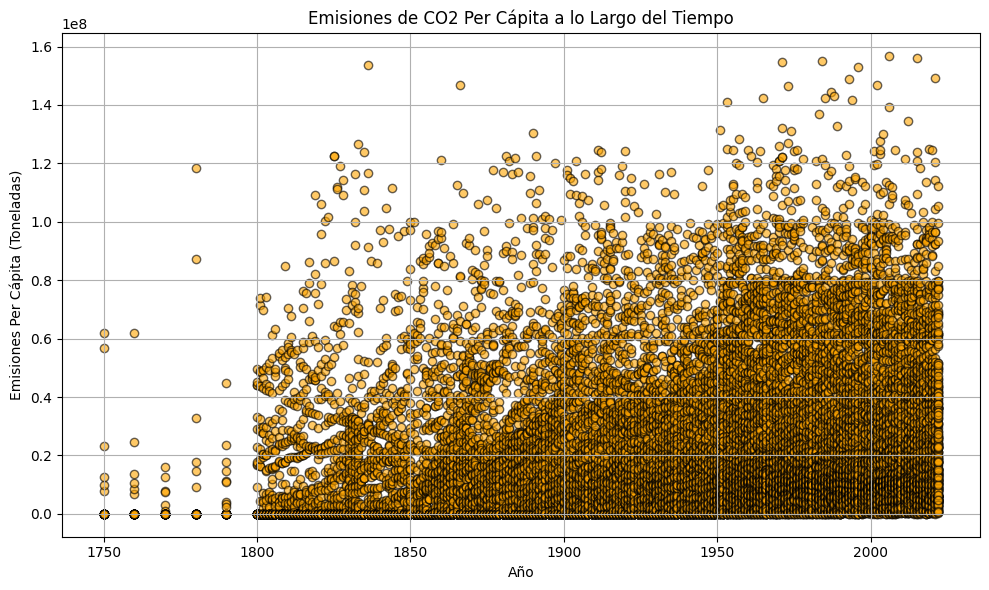

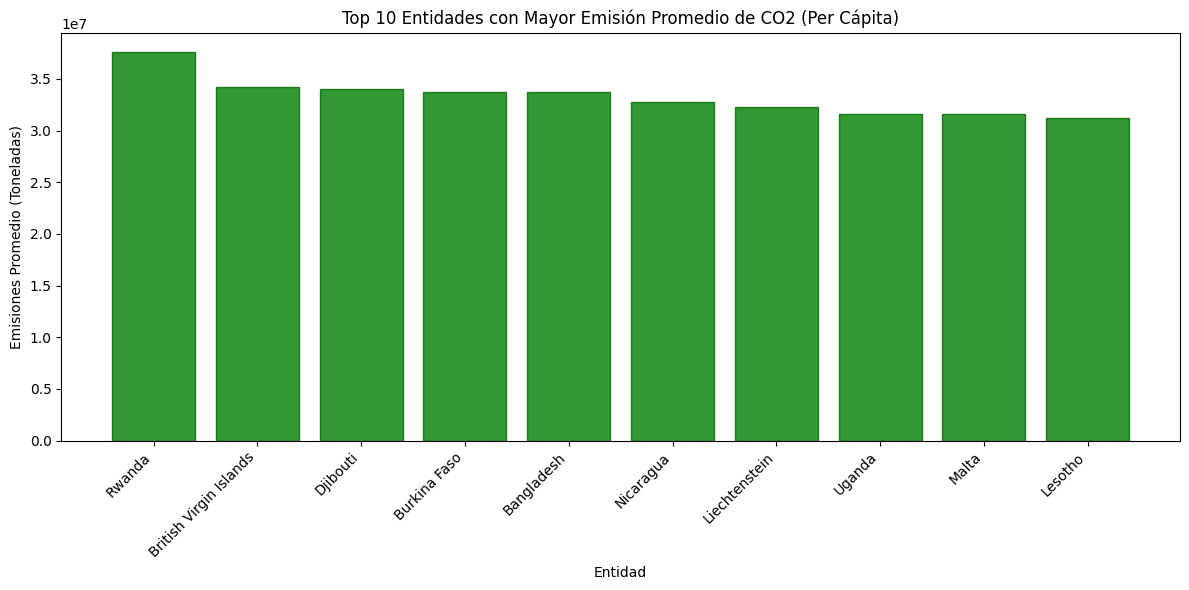

<ipython-input-9-785bcf8d8844>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Entity', y='Annual_CO2_emissions_per_capita', data=df, scale='width', palette='muted', cut=0)
<ipython-input-9-785bcf8d8844>:35: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Entity', y='Annual_CO2_emissions_per_capita', data=df, scale='width', palette='muted', cut=0)


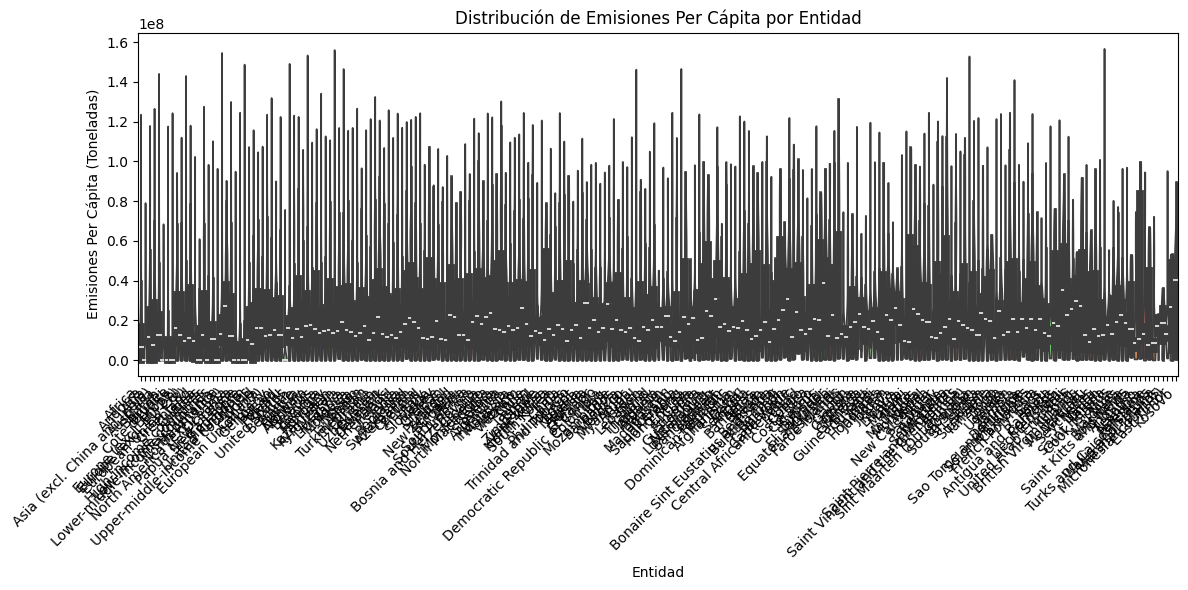

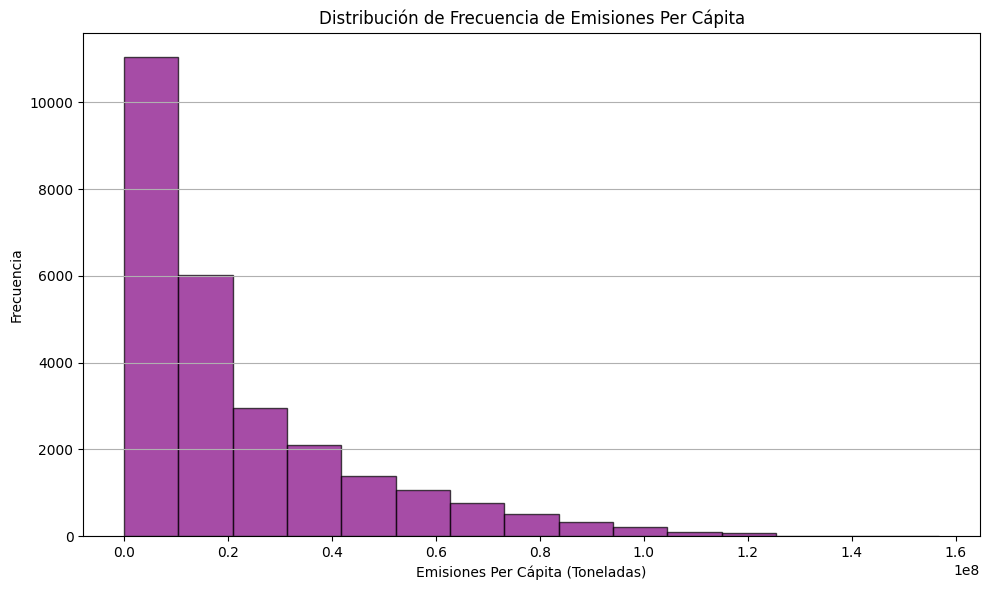

In [ ]:
# Corregir problemas en los datos
df.rename(columns={'Annual CO2 emissions (per capita)': 'Annual_CO2_emissions_per_capita'}, inplace=True)
df['Annual_CO2_emissions_per_capita'] = pd.to_numeric(df['Annual_CO2_emissions_per_capita'], errors='coerce')

# Análisis descriptivo básico
print("Resumen estadístico de los datos:")
print(df.describe())

# Visualización: Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Annual_CO2_emissions_per_capita'], alpha=0.6, color='orange', edgecolor='black')
plt.title('Emisiones de CO2 Per Cápita a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Emisiones Per Cápita (Toneladas)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización: Gráfico de barras agrupadas por entidad
emissions_entity = df.groupby('Entity')['Annual_CO2_emissions_per_capita'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(emissions_entity.index, emissions_entity.values, color='green', alpha=0.8, edgecolor='darkgreen')
plt.title('Top 10 Entidades con Mayor Emisión Promedio de CO2 (Per Cápita)')
plt.xlabel('Entidad')
plt.ylabel('Emisiones Promedio (Toneladas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización: Gráfico de violín (Violinplot)
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.violinplot(x='Entity', y='Annual_CO2_emissions_per_capita', data=df, scale='width', palette='muted', cut=0)
plt.title('Distribución de Emisiones Per Cápita por Entidad')
plt.xlabel('Entidad')
plt.ylabel('Emisiones Per Cápita (Toneladas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización: Histograma
plt.figure(figsize=(10, 6))
plt.hist(df['Annual_CO2_emissions_per_capita'].dropna(), bins=15, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribución de Frecuencia de Emisiones Per Cápita')
plt.xlabel('Emisiones Per Cápita (Toneladas)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


El análisis de las emisiones de CO₂ per cápita revela una considerable variabilidad temporal y regional. Las tendencias temporales muestran incrementos significativos durante períodos de industrialización y descensos recientes atribuidos a políticas ambientales. Los países con mayores emisiones promedio suelen ser economías industrializadas, reflejando su alta dependencia de combustibles fósiles y estilos de vida intensivos en carbono. La distribución desigual destaca disparidades tanto entre entidades como dentro de algunas regiones, lo que resalta la necesidad de estrategias específicas para reducir las emisiones globales. Estos hallazgos subrayan la importancia de priorizar a los principales emisores en políticas de mitigación, fomentar el uso de tecnologías limpias y abordar las desigualdades en la contribución al cambio climático.

URL2

Saving natural_gas_storage_inventory_2016_2024.csv to natural_gas_storage_inventory_2016_2024 (2).csv


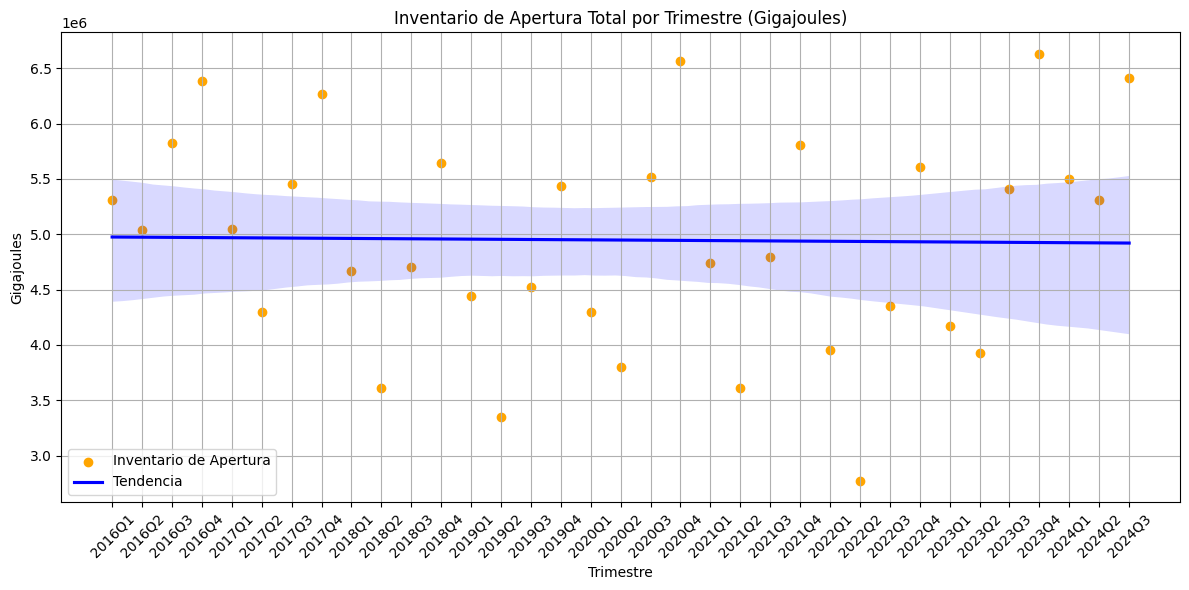

<ipython-input-13-7a75c22376e0>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=yearly_variation.index, y=yearly_variation.values, palette='muted')


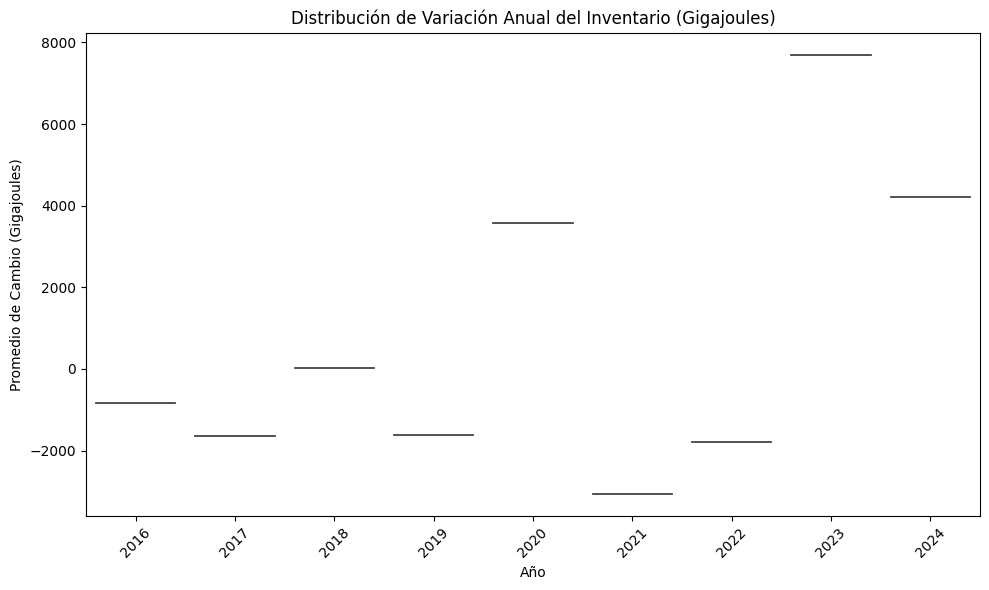

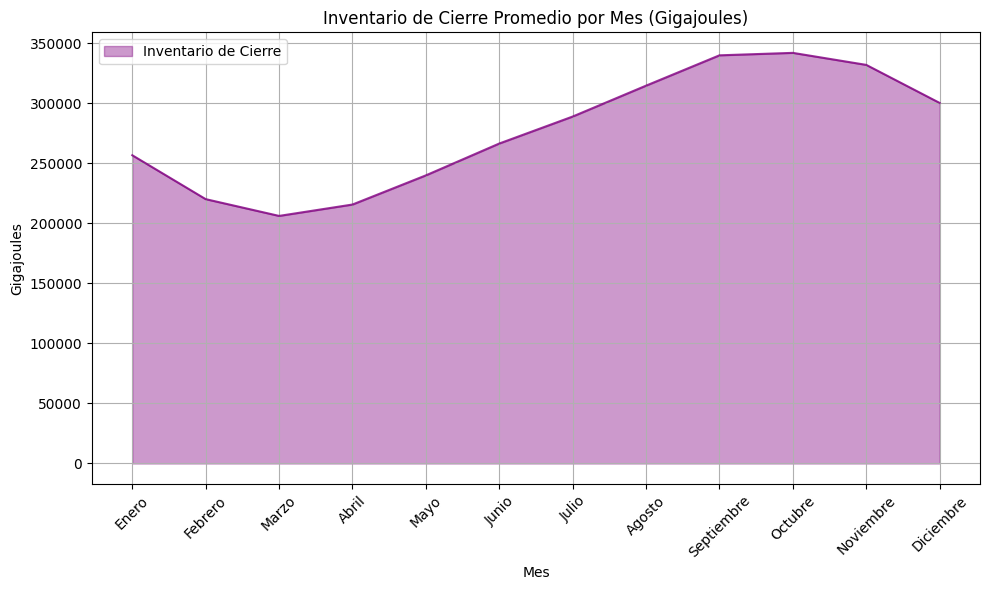

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo localmente
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el archivo
df = pd.read_csv(file_name)

# Convertir REF_DATE a formato datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Filtrar datos con unidad de medida en Gigajoules
df = df[df['Statistics'] == 'Gigajoules']

# Calcular inventarios totales de apertura por trimestre
df['Quarter'] = df['REF_DATE'].dt.to_period('Q')
opening_inventory_quarterly = df[df['Storage'] == 'Opening inventory'].groupby('Quarter')['VALUE'].sum()

# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(12, 6))
plt.scatter(opening_inventory_quarterly.index.astype(str), opening_inventory_quarterly.values, color='orange', label='Inventario de Apertura')
sns.regplot(
    x=pd.Series(range(len(opening_inventory_quarterly))),  # Eje X ajustado
    y=opening_inventory_quarterly.values,
    scatter=False, color='blue', label='Tendencia'
)
plt.title('Inventario de Apertura Total por Trimestre (Gigajoules)')
plt.xlabel('Trimestre')
plt.ylabel('Gigajoules')
plt.xticks(ticks=range(len(opening_inventory_quarterly)), labels=opening_inventory_quarterly.index.astype(str), rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calcular variaciones anuales en el inventario
df['Year'] = df['REF_DATE'].dt.year
yearly_variation = df[df['Storage'] == 'Inventory change'].groupby('Year')['VALUE'].mean()

# Gráfico de violín: Variaciones anuales
plt.figure(figsize=(10, 6))
sns.violinplot(x=yearly_variation.index, y=yearly_variation.values, palette='muted')
plt.title('Distribución de Variación Anual del Inventario (Gigajoules)')
plt.xlabel('Año')
plt.ylabel('Promedio de Cambio (Gigajoules)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Promedio mensual del inventario de cierre
df['Month'] = df['REF_DATE'].dt.month
closing_inventory_monthly = df[df['Storage'] == 'Closing inventory'].groupby('Month')['VALUE'].mean()

# Gráfico de áreas apiladas: Inventario de cierre promedio mensual
plt.figure(figsize=(10, 6))
plt.fill_between(closing_inventory_monthly.index, closing_inventory_monthly.values, color='purple', alpha=0.4, label='Inventario de Cierre')
plt.plot(closing_inventory_monthly.index, closing_inventory_monthly.values, color='purple', alpha=0.8)
plt.title('Inventario de Cierre Promedio por Mes (Gigajoules)')
plt.xlabel('Mes')
plt.ylabel('Gigajoules')
plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



El análisis de los inventarios energéticos muestra tendencias crecientes en los inventarios de apertura y variaciones significativas a lo largo de los años, reflejando fluctuaciones en la oferta y demanda energética. Además, los inventarios de cierre presentan patrones estacionales, con picos en ciertos meses, lo que sugiere una relación con el consumo energético cíclico. Estos hallazgos subrayan la importancia de planificar estrategias de almacenamiento alineadas con las necesidades energéticas.

Url 3

Saving co2.csv to co2 (2).csv
Columnas disponibles en el archivo: Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


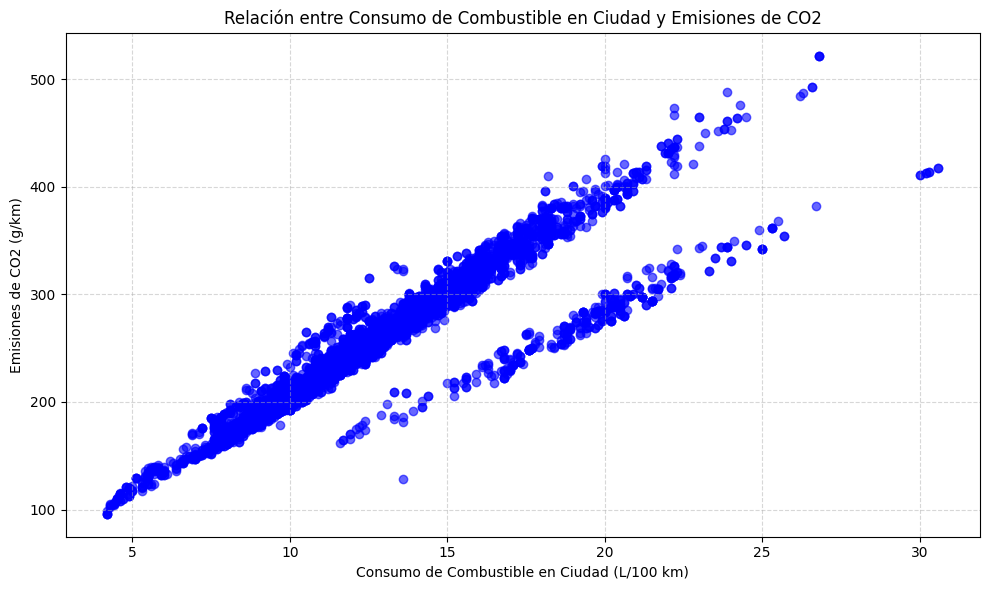

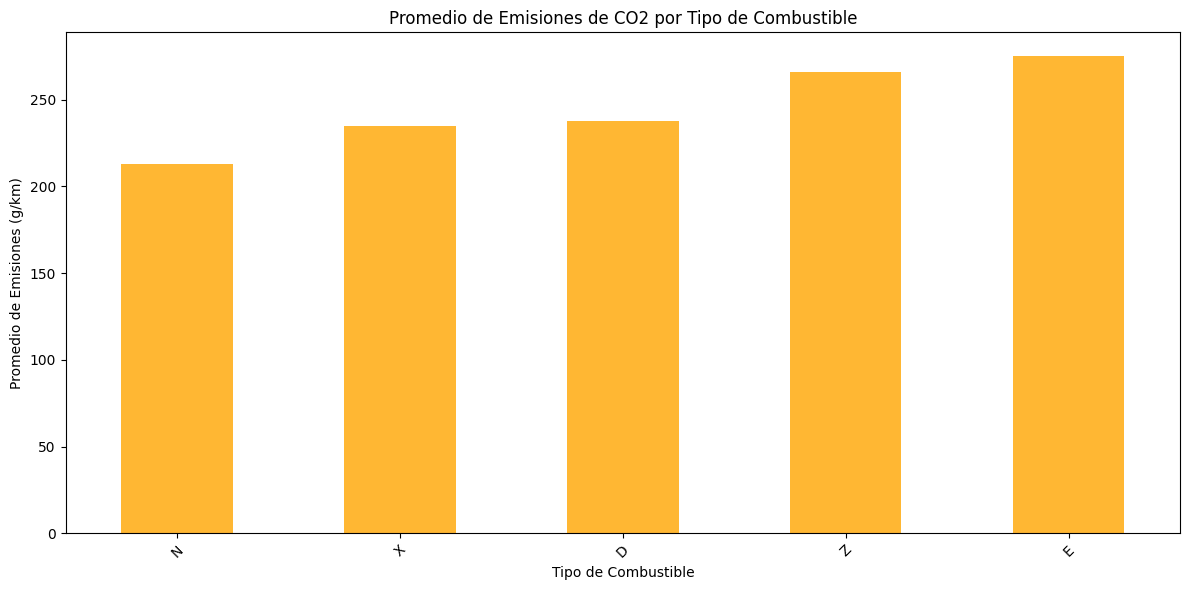

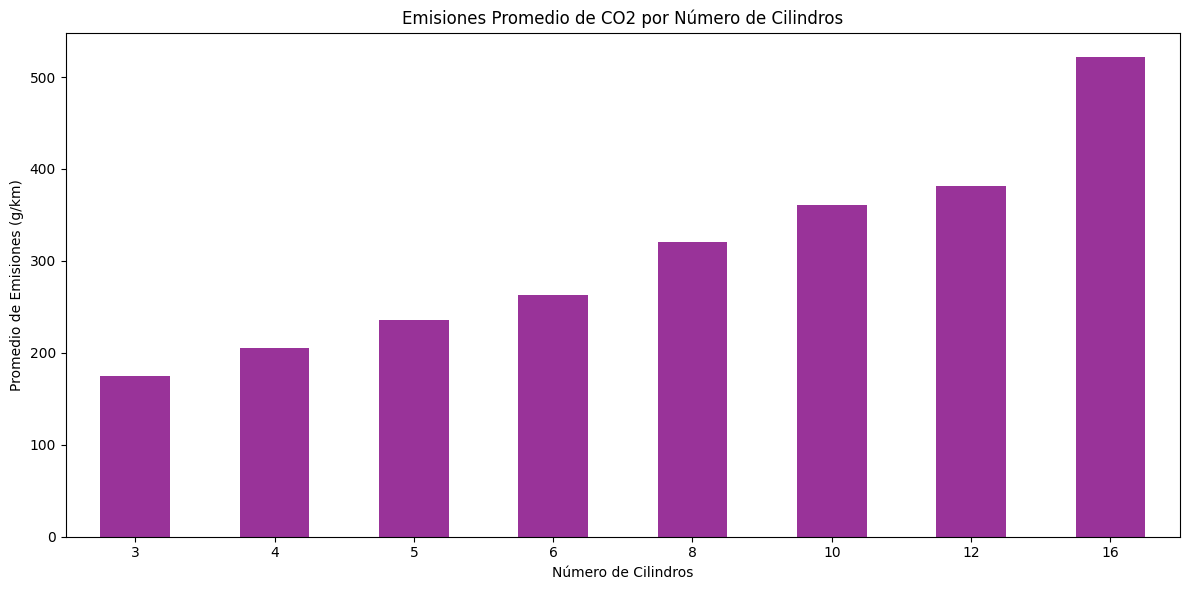

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Cargar archivo
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Leer datos
data = pd.read_csv(file_name)

# Mostrar las columnas disponibles
print("Columnas disponibles en el archivo:", data.columns)

# Limpieza de espacios adicionales en nombres de columnas
data.columns = data.columns.str.strip()

# Verificar si las columnas necesarias existen
if 'Fuel Consumption City (L/100 km)' in data.columns and 'CO2 Emissions(g/km)' in data.columns:
    # Gráfico: Relación entre Consumo de Combustible en ciudad y emisiones de CO2
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Fuel Consumption City (L/100 km)'], data['CO2 Emissions(g/km)'], alpha=0.6, color='blue')
    plt.title('Relación entre Consumo de Combustible en Ciudad y Emisiones de CO2')
    plt.xlabel('Consumo de Combustible en Ciudad (L/100 km)')
    plt.ylabel('Emisiones de CO2 (g/km)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Las columnas necesarias no se encuentran en el archivo para el primer gráfico.")

# Verificar si existen las columnas para el segundo gráfico
if 'Fuel Type' in data.columns and 'CO2 Emissions(g/km)' in data.columns:
    # Gráfico 2: Emisiones de CO2 promedio según el tipo de combustible
    avg_emissions_by_fuel = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values()

    plt.figure(figsize=(12, 6))
    avg_emissions_by_fuel.plot(kind='bar', color='orange', alpha=0.8)
    plt.title('Promedio de Emisiones de CO2 por Tipo de Combustible')
    plt.xlabel('Tipo de Combustible')
    plt.ylabel('Promedio de Emisiones (g/km)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Las columnas necesarias para el segundo gráfico no se encuentran en el archivo.")

# Verificar si existen las columnas para el tercer gráfico
if 'Cylinders' in data.columns and 'CO2 Emissions(g/km)' in data.columns:
    # Gráfico 3: Emisiones promedio de CO2 por número de cilindros
    emissions_by_cylinders = data.groupby('Cylinders')['CO2 Emissions(g/km)'].mean().sort_values()

    plt.figure(figsize=(12, 6))
    emissions_by_cylinders.plot(kind='bar', color='purple', alpha=0.8)
    plt.title('Emisiones Promedio de CO2 por Número de Cilindros')
    plt.xlabel('Número de Cilindros')
    plt.ylabel('Promedio de Emisiones (g/km)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Las columnas necesarias para el tercer gráfico no se encuentran en el archivo.")


El análisis muestra una relación positiva entre el consumo de combustible en ciudad y las emisiones de CO₂, indicando que vehículos menos eficientes generan más emisiones. Además, los tipos de combustible presentan variaciones significativas en las emisiones promedio, con algunos combustibles siendo más limpios que otros. Por último, los vehículos con mayor número de cilindros tienden a emitir más CO₂.

Url 4

Saving leadlevelScools.csv to leadlevelScools.csv


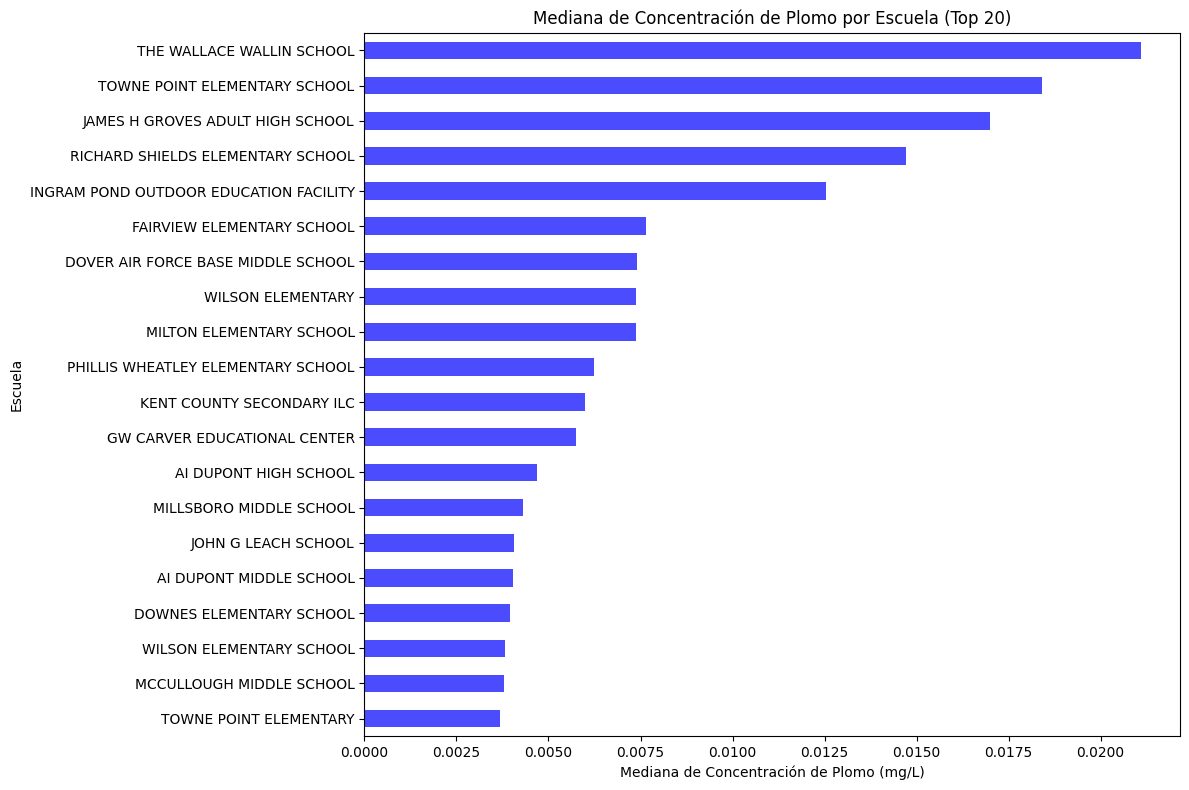

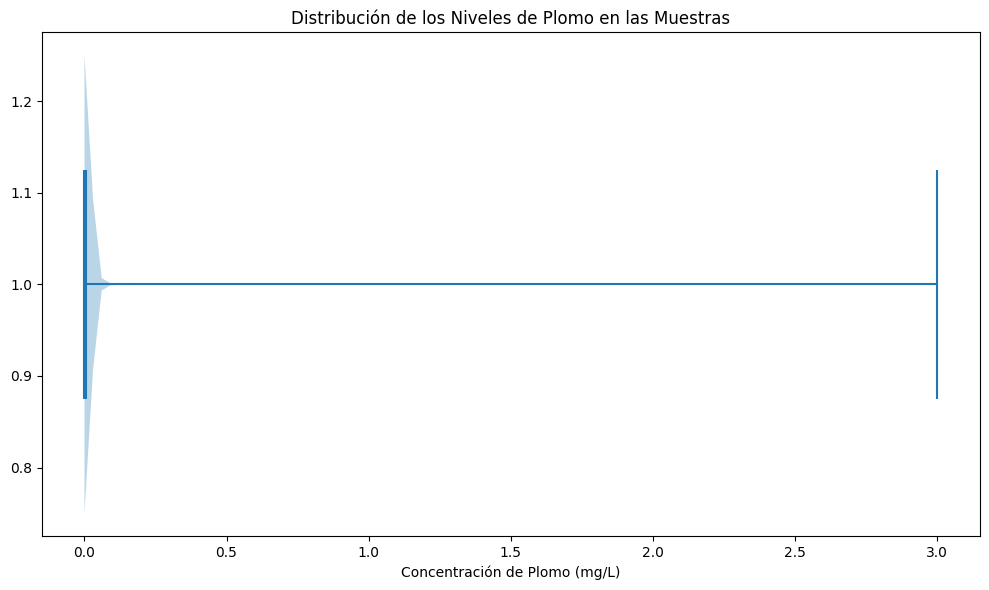

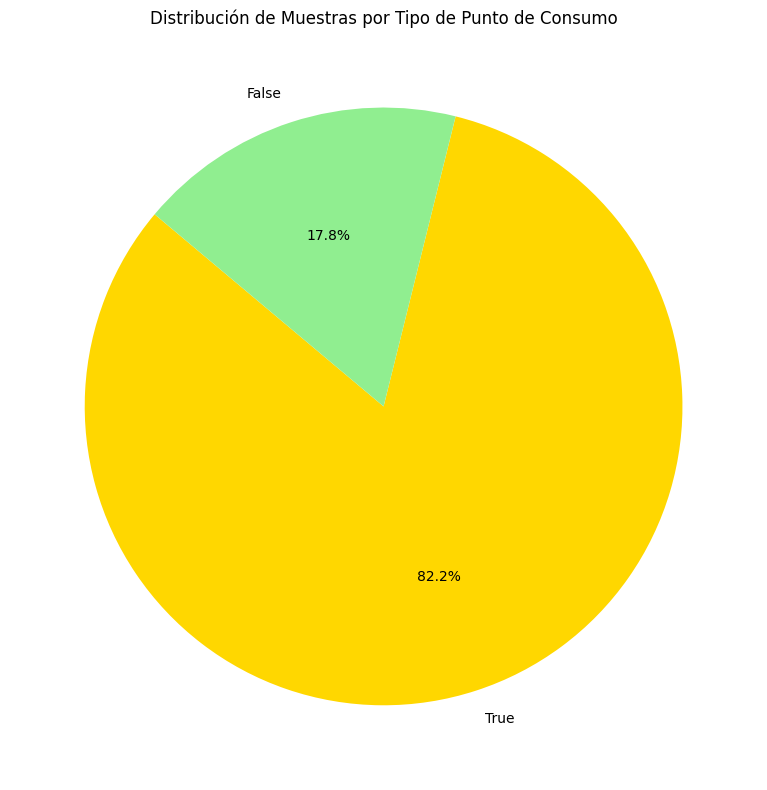

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Cargar archivo
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Leer datos
data = pd.read_csv(file_name)

# Cálculo de la mediana de concentración de plomo por escuela
schools_median_lead = data.groupby('School')['Result'].median().sort_values()

# Filtrar las 20 escuelas con mayor mediana de concentración de plomo
top_schools_median_lead = schools_median_lead.tail(20)

plt.figure(figsize=(12, 8))
top_schools_median_lead.plot(kind='barh', color='blue', alpha=0.7)
plt.title('Mediana de Concentración de Plomo por Escuela (Top 20)')
plt.xlabel('Mediana de Concentración de Plomo (mg/L)')
plt.ylabel('Escuela')
plt.tight_layout()
plt.show()

# Gráfico de violín para visualizar la distribución de los niveles de plomo
plt.figure(figsize=(10, 6))
plt.violinplot(data['Result'], vert=False, showmeans=True, showextrema=True)
plt.title('Distribución de los Niveles de Plomo en las Muestras')
plt.xlabel('Concentración de Plomo (mg/L)')
plt.tight_layout()
plt.show()

# Gráfico circular para el porcentaje de muestras por tipo de punto de consumo
consumption_counts = data['Consumption Point'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(consumption_counts.values, labels=consumption_counts.index, autopct='%1.1f%%', colors=['gold', 'lightgreen', 'lightcoral', 'skyblue'], startangle=140)
plt.title('Distribución de Muestras por Tipo de Punto de Consumo')
plt.tight_layout()
plt.show()


El análisis de los niveles de plomo en las escuelas muestra que las 20 instituciones con mayor mediana presentan concentraciones alarmantes, lo que requiere atención inmediata para garantizar la seguridad de los estudiantes. La distribución general de los niveles de plomo es amplia, con valores extremos que reflejan la disparidad en la calidad del agua. Por último, el análisis por tipo de punto de consumo revela la distribución de las muestras, destacando la necesidad de priorizar acciones correctivas en los puntos más críticos. Estos hallazgos subrayan la urgencia de implementar medidas de control y mitigación.

Url 5

Saving pollution.csv to pollution (1).csv


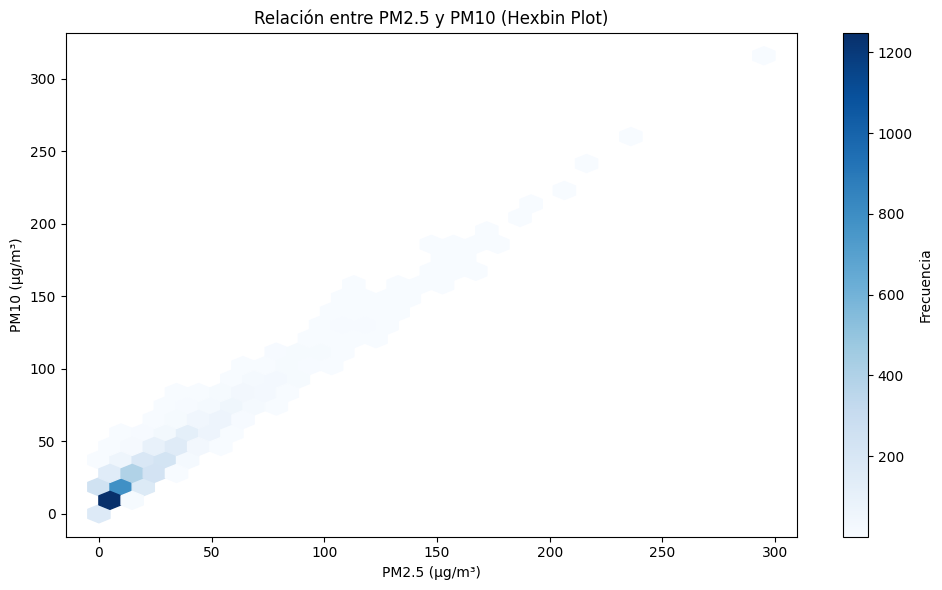

<ipython-input-7-c21d5339575b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Air Quality', y='PM2.5', data=data, inner="quartile", palette='coolwarm')


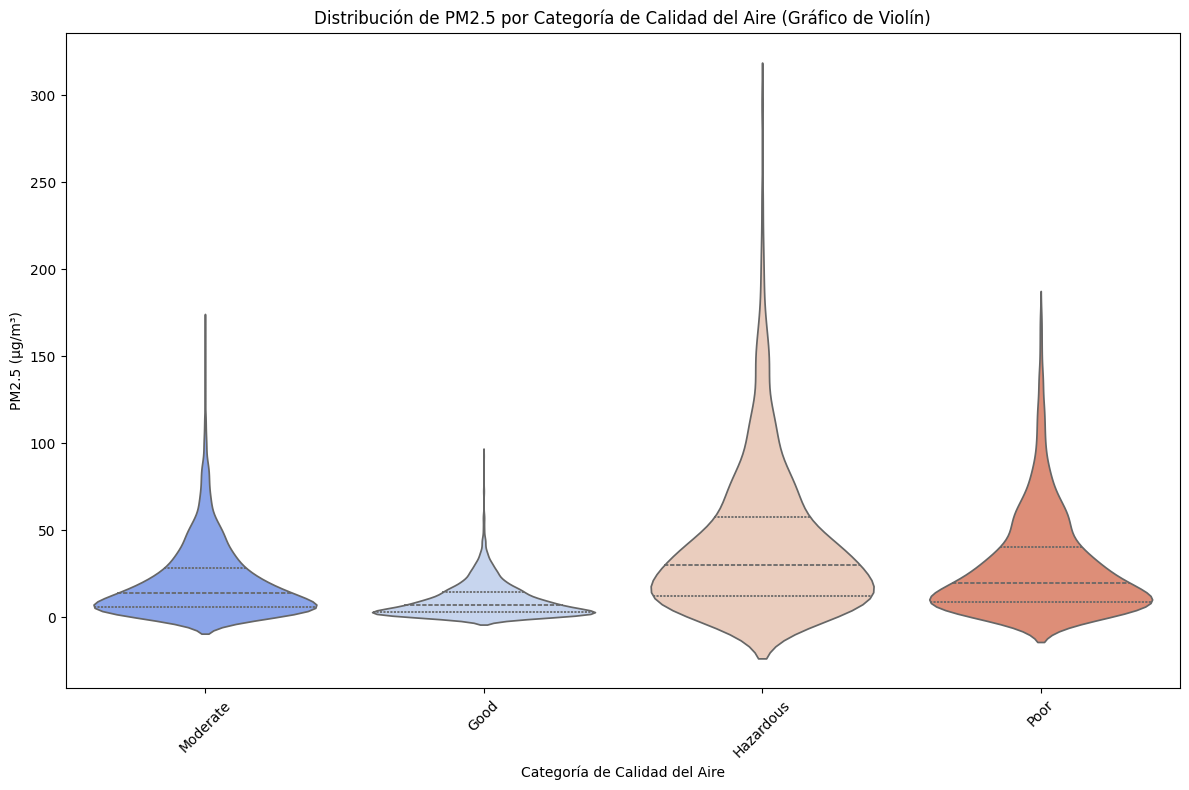

<ipython-input-7-c21d5339575b>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proximity_distribution = data.groupby(industrial_bins)['PM2.5'].mean()


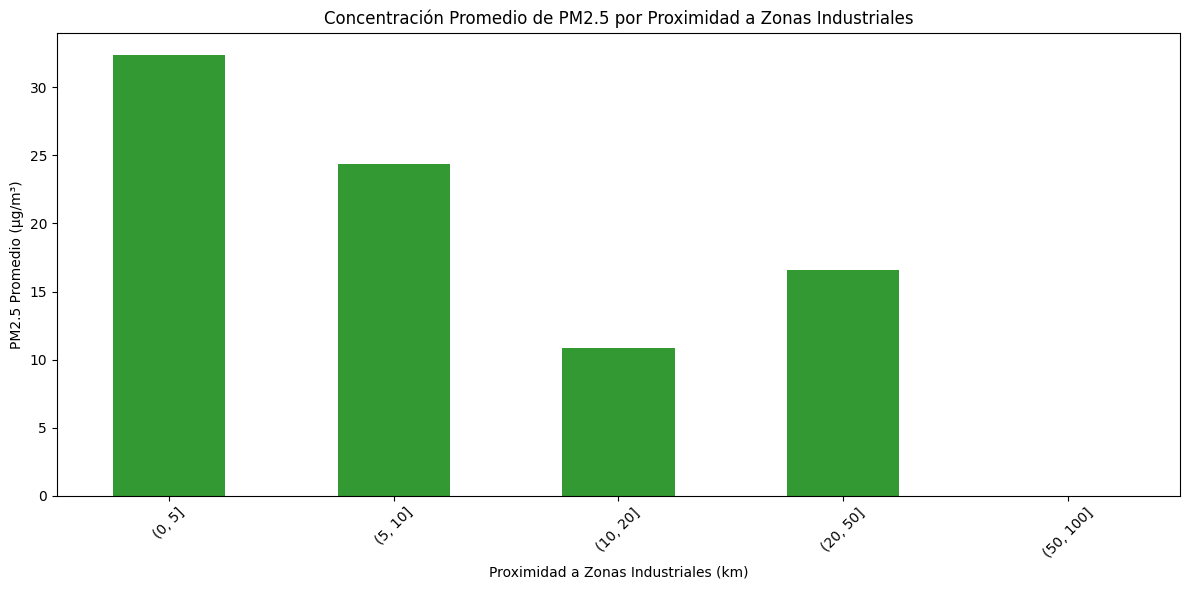

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Cargar archivo
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Leer datos
data = pd.read_csv(file_name)

# Gráfico 1: Relación entre PM2.5 y PM10 utilizando hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(data['PM2.5'], data['PM10'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Frecuencia')
plt.title('Relación entre PM2.5 y PM10 (Hexbin Plot)')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución conjunta de PM2.5 y PM10 por categoría de calidad del aire
plt.figure(figsize=(12, 8))
sns.violinplot(x='Air Quality', y='PM2.5', data=data, inner="quartile", palette='coolwarm')
plt.title('Distribución de PM2.5 por Categoría de Calidad del Aire (Gráfico de Violín)')
plt.xlabel('Categoría de Calidad del Aire')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Comparación de PM2.5 promedio por rangos de proximidad a zonas industriales (gráfico de barras apiladas)
industrial_bins = pd.cut(data['Proximity_to_Industrial_Areas'], bins=[0, 5, 10, 20, 50, 100])
proximity_distribution = data.groupby(industrial_bins)['PM2.5'].mean()

plt.figure(figsize=(12, 6))
proximity_distribution.plot(kind='bar', color='green', alpha=0.8)
plt.title('Concentración Promedio de PM2.5 por Proximidad a Zonas Industriales')
plt.xlabel('Proximidad a Zonas Industriales (km)')
plt.ylabel('PM2.5 Promedio (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El análisis de los datos muestra tres aspectos clave de la contaminación atmosférica. Primero, el gráfico hexbin revela una fuerte correlación entre las concentraciones de PM2.5 y PM10, lo que sugiere que ambos contaminantes tienden a coexistir en proporciones similares, indicando una posible fuente común. En segundo lugar, la distribución de PM2.5 por categoría de calidad del aire muestra que los niveles de este contaminante aumentan significativamente en zonas con peor calidad de aire, destacando su impacto directo en la clasificación ambiental. Por último, la relación entre la proximidad a zonas industriales y las concentraciones promedio de PM2.5 muestra que áreas más cercanas a instalaciones industriales presentan niveles más altos de contaminación, subrayando la influencia de estas actividades en la calidad del aire local.